In [44]:
from openmmtools.multistate import MultiStateReporter, MultiStateSamplerAnalyzer

from tqdm import tqdm_notebook

import matplotlib.pyplot as plt

import pickle

import numpy as np

# AREX 50 ns/replica complex phase

In [3]:
g_ts_arex = []
main_dir = 47
other_dir = 45
d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in tqdm_notebook(range(28)):
    
    if sub_dir == 4:
        replicate = 0
    else:
        replicate = 1
    
    if sub_dir in [4, 12, 17]:
        main_dir = 45
        sub_dir = d_mapping[sub_dir]
    else:
        main_dir = 47
        
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_complex.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=50000)
    transition_matrix, eigenvalues, g_t = analyzer.generate_mixing_statistics()
    g_ts_arex.append(g_t)

/scratch/lsftmp/18251327.tmpdir/ipykernel_338210/1585312885.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir in tqdm_notebook(range(28)):


  0%|          | 0/28 [00:00<?, ?it/s]

Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint

Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!


In [4]:
with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/47/g_ts.pickle", "wb") as f:
    pickle.dump(g_ts_arex, f)

In [5]:
g_ts_arex

[1030.6128851964143,
 10871.459646492685,
 6216.325507357654,
 12122.524244629312,
 1895.8579806331504,
 2678.9599042794894,
 1920.2250671418751,
 9951.605507442986,
 18969.706673881257,
 14360.448133753582,
 7970.325307641586,
 30906.215958685603,
 27892.881141591355,
 15809.64137475853,
 1721.7273158184344,
 2359.721092706552,
 5228.822358607226,
 8195.537322967457,
 1551.0750526185466,
 2368.601006185404,
 1594.9201973575389,
 16781.863500293097,
 20096.73265976951,
 12507.377549886301,
 4790.26511723632,
 26121.05472465025,
 25822.019996998213,
 18806.741553678094]

# AREST 50 ns/replica complex phase

In [8]:
g_ts_arest = []
main_dir = 52
for sub_dir in tqdm_notebook(range(28)):
    
    if sub_dir in [19, 21]:
        replicate = 1
    else:
        replicate = 0
    
    filename = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{sub_dir}_complex.nc"
    reporter = MultiStateReporter(filename, open_mode='r')
    analyzer = MultiStateSamplerAnalyzer(reporter, max_n_iterations=50000)
    transition_matrix, eigenvalues, g_t = analyzer.generate_mixing_statistics()
    g_ts_arest.append(g_t)

/scratch/lsftmp/18251327.tmpdir/ipykernel_338210/3383893125.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sub_dir in tqdm_notebook(range(28)):


  0%|          | 0/28 [00:00<?, ?it/s]

Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint

Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!
Could not locate checkpoint subfile. This is okay for analysis if the solvent trajectory is not needed, but not for production simulation!


In [10]:
with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/52/g_ts.pickle", "wb") as f:
    pickle.dump(g_ts_arest, f)

# AREST vs AREX g_t plot

In [53]:
# Load g_ts
with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/47/g_ts.pickle", "rb") as f:
    g_ts_arex = pickle.load(f)
    
with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/52/g_ts.pickle", "rb") as f:
    g_ts_arest = pickle.load(f)
    
# Convert units to ns
g_ts_arex = np.array(g_ts_arex)/1000
g_ts_arest = np.array(g_ts_arest)/1000

# Note that we divide the statistical inefficiencies by 1000 to get units of ns 
# because the samples are saved every 1 iterations and each iteration is 1 ps, 
# so the units of each sample are 1 ps. Since 1000 ps is 1 ns, if we divide
# each statistical inefficiency by 1000, we get units of ns.

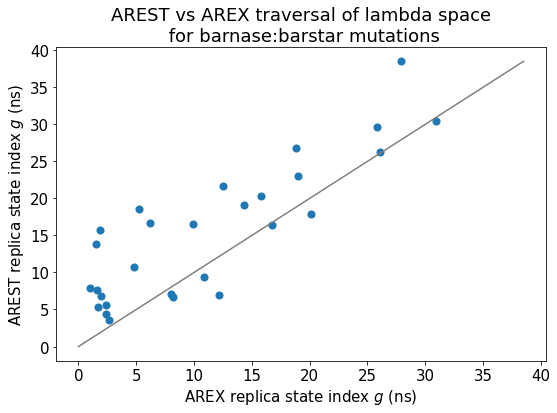

In [58]:
# Set figure size
fig, axes = plt.subplots(nrows=1, ncols=1, sharex='col', figsize=(8, 6), squeeze=True)
    
# Set font size
plt.rc('font', size=15) 

plt.scatter(g_ts_arex, g_ts_arest, s=50)
plt.plot([0, max(g_ts_arest)], [0, max(g_ts_arest)], color='gray')

# Set title
plt.title(f"AREST vs AREX traversal of lambda space\n for barnase:barstar mutations")

# Set axis labels
g_regex = r"$g$"
plt.xlabel(f"AREX replica state index {g_regex} (ns)")
plt.ylabel(f"AREST replica state index {g_regex} (ns)")

# Ensure x-axis labels are not cut off
plt.tight_layout()

# Save figure
save_path = "/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/52/arest_vs_arex_g_t.pdf"
plt.savefig(save_path, dpi=500)

plt.show()

In [59]:
g_ts_arest[12]

38.51226295571173

In [60]:
g_ts_arex[12]

27.892881141591356

In [61]:
g_ts_arest[17]

6.657324128778962